<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r12-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-1-r12.csv?token=AKVFSOHA22D43W4EI7X4NYC63JFGI')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-11-r12.csv?token=AKVFSODJ2VS24KRBYQIJD3S63JFGM')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-4-m-1-r12.csv?token=AKVFSOBVDHVVHZZXH3RCL7C63JFGQ')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-4-m-11-r12.csv?token=AKVFSOHJCYPW5Z6JE6QH7Y263JFGU')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-6-m-1-r12.csv?token=AKVFSOCMNOH254MXRFKBFLC63JFG2')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-6-m-11-r12.csv?token=AKVFSOBTW3GOYMTQWREAEZS63JFHA')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-9-m-1-r12.csv?token=AKVFSOG2AAMPBBWFFB7QZUK63JFHG')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-9-m-11-r12.csv?token=AKVFSOGMVUN2GSRNBP7L43C63JFHK')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-normal-n-0-15-r12.csv?token=AKVFSOG7434YOYMQFHD2A6S63JFHQ')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-normal-n-0-4-r12.csv?token=AKVFSOETJZRKT5LD2DKFWHC63JFHU')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-normal-n-0-6-r12.csv?token=AKVFSOCZK2XNNVLCGIL33J263JFHY')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-normal-n-0-9-r12.csv?token=AKVFSOBVUUWDIUCAEEVQAMS63JFH4')

In [39]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(17909, 26)
(17909, 26)
(13602, 26)
(13602, 26)
(12725, 26)
(12725, 26)
(12725, 26)
(12725, 26)
(13953, 26)
(9592, 26)
(8757, 26)
(8757, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r12-train.csv',index=False)

In [41]:
df = pd.read_csv('fft-r12-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,96,3,2,1,1,4,3,9,15,15,24,8,4,4,3,0.75,16,1,1,1,1,6,16,3,27,0
1,96,3,2,1,1,4,3,9,15,15,24,8,3,4,3,0.75,16,1,1,1,1,6,12,3,27,1
2,114,3,2,1,1,4,3,9,15,15,24,8,5,4,3,0.75,16,1,1,1,1,6,20,3,27,0
3,1117,0,3,1,1,4,3,9,6,6,28,12,24,4,4,1.00,20,6,1,6,6,0,96,3,27,1
4,1125,2,0,2,1,4,3,9,28,12,27,11,24,4,0,0.00,4,5,2,6,10,0,192,6,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154976,3275216,2,0,6,4,2,3,10,28,12,27,11,30077,4,0,0.00,25,5,10,14,50,0,1443696,18,180,0
154977,3275223,2,0,6,5,3,3,10,28,12,27,11,30077,4,0,0.00,32,4,11,14,44,0,2706930,18,180,0
154978,3275224,2,0,2,1,4,3,11,28,12,27,11,30078,4,0,0.00,32,3,12,14,36,0,240624,6,66,0
154979,3275225,2,0,7,1,4,3,12,28,12,15,15,30077,3,0,0.00,5,2,13,14,26,0,842156,21,252,0


In [42]:
df.shape

(154981, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-12-r12.csv?token=AKVFSOAQGBVPWTBK23STAH263JFYI')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-15-m-7-r12.csv?token=AKVFSOACXGKWQCFQJMZE7OK63JFYM')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-4-m-12-r12.csv?token=AKVFSOEP6PXCYIEXXGXIMAS63JFYS')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-4-m-7-r12.csv?token=AKVFSOEPFPRE6YMP5OPPTWC63JFYW')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-6-m-12-r12.csv?token=AKVFSOE34UMVNGJ6LETMSXC63JFY2')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-6-m-7-r12.csv?token=AKVFSODWIH76NTQVZ2HRY7263JFY6')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-9-m-12-r12.csv?token=AKVFSOHIESF6HVPVT7QHJYK63JFZG')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r12/2-fft-malicious-n-0-9-m-7-r12.csv?token=AKVFSOEYEBJJAOXQMTBOKYC63JFZM')

In [44]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(78027, 26)
(17909, 26)
(73474, 26)
(13602, 26)
(72609, 26)
(12725, 26)
(72609, 26)
(12725, 26)


In [45]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,1129,0,3,1,1,4,3,9,6,6,28,12,36,4,4,1.00,20,9,1,9,9,0,144,3,27,0
1,1137,2,0,2,1,4,3,9,28,12,27,11,36,4,0,0.00,4,8,2,9,16,0,288,6,54,0
2,1202,0,3,1,1,4,3,9,1,1,28,12,38,5,5,1.00,20,7,3,9,21,0,152,3,27,0
3,1206,0,3,3,1,4,3,10,27,11,28,12,36,4,4,1.00,20,6,4,9,24,0,432,9,90,0
4,1210,2,0,2,1,4,3,10,28,12,27,11,38,4,0,0.00,4,5,5,9,25,0,304,6,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,3264595,2,0,2,1,4,3,11,28,12,27,11,30072,4,0,0.00,32,3,12,14,36,0,240576,6,66,0
12721,3264596,3,0,7,1,4,3,12,28,12,0,0,30071,3,0,0.00,6,2,13,14,26,0,841988,21,252,0
12722,3264676,0,3,3,1,4,3,9,27,11,28,12,30072,4,4,1.00,20,1,14,14,14,0,360864,9,81,0
12723,3265178,3,2,7,1,4,3,9,29,13,0,0,30077,4,1,0.25,10,2,1,2,2,6,842156,21,189,0


Processing

In [46]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [48]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.653830,0.411256,-0.101732,0.140459,NaN,0.283931,-0.046166,0.515768,-0.565324,-0.747082,-0.388350,-0.317708,0.108868,-0.164069,-0.081240,0.628902,0.044902,0.411256,0.451396,0.050154
inport,-0.653830,1.000000,-0.350675,-0.027838,0.038435,NaN,-0.630222,-0.018077,-0.151120,0.922076,0.972861,0.443828,0.210824,-0.284612,-0.057970,-0.084611,0.154189,-0.124079,-0.350675,-0.509715,0.006644
cache_coherence_type,0.411256,-0.350675,1.000000,0.251770,-0.347613,NaN,0.037096,0.021515,0.104939,-0.367720,-0.406114,-0.570176,-0.035689,-0.050977,-0.068086,-0.031905,0.160151,0.316911,1.000000,0.950141,0.011255
flit_id,-0.101732,-0.027838,0.251770,1.000000,-0.231987,NaN,-0.025425,0.028334,-0.067779,-0.026678,0.016812,0.525887,0.095047,0.013866,0.085564,0.095715,-0.132419,0.704406,0.251770,0.236984,-0.009382
flit_type,0.140459,0.038435,-0.347613,-0.231987,1.000000,NaN,0.035103,-0.039119,0.093581,0.036833,-0.023212,0.219510,-0.319097,0.174156,-0.113869,-0.089083,0.182827,0.007868,-0.347613,-0.327199,0.012953
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.283931,-0.630222,0.037096,-0.025425,0.035103,NaN,1.000000,0.032088,-0.008227,-0.597584,-0.595280,-0.182903,-0.101196,0.224780,0.097091,0.104588,-0.278260,0.036328,0.037096,0.336277,-0.021230
traversal_id,-0.046166,-0.018077,0.021515,0.028334,-0.039119,NaN,0.032088,1.000000,-0.023604,-0.011189,-0.007731,0.024911,0.152189,0.152738,0.239557,0.181135,-0.080119,0.504334,0.021515,0.029800,-0.308610
hop_count,0.515768,-0.151120,0.104939,-0.067779,0.093581,NaN,-0.008227,-0.023604,1.000000,0.126130,-0.244020,-0.018581,-0.194219,0.004723,-0.148872,-0.080517,0.555108,-0.007806,0.104939,0.085610,-0.060716
current_hop,-0.565324,0.922076,-0.367720,-0.026678,0.036833,NaN,-0.597584,-0.011189,0.126130,1.000000,0.918620,0.476081,0.178071,-0.242752,-0.050815,-0.076124,0.202503,-0.122246,-0.367720,-0.513195,-0.032190


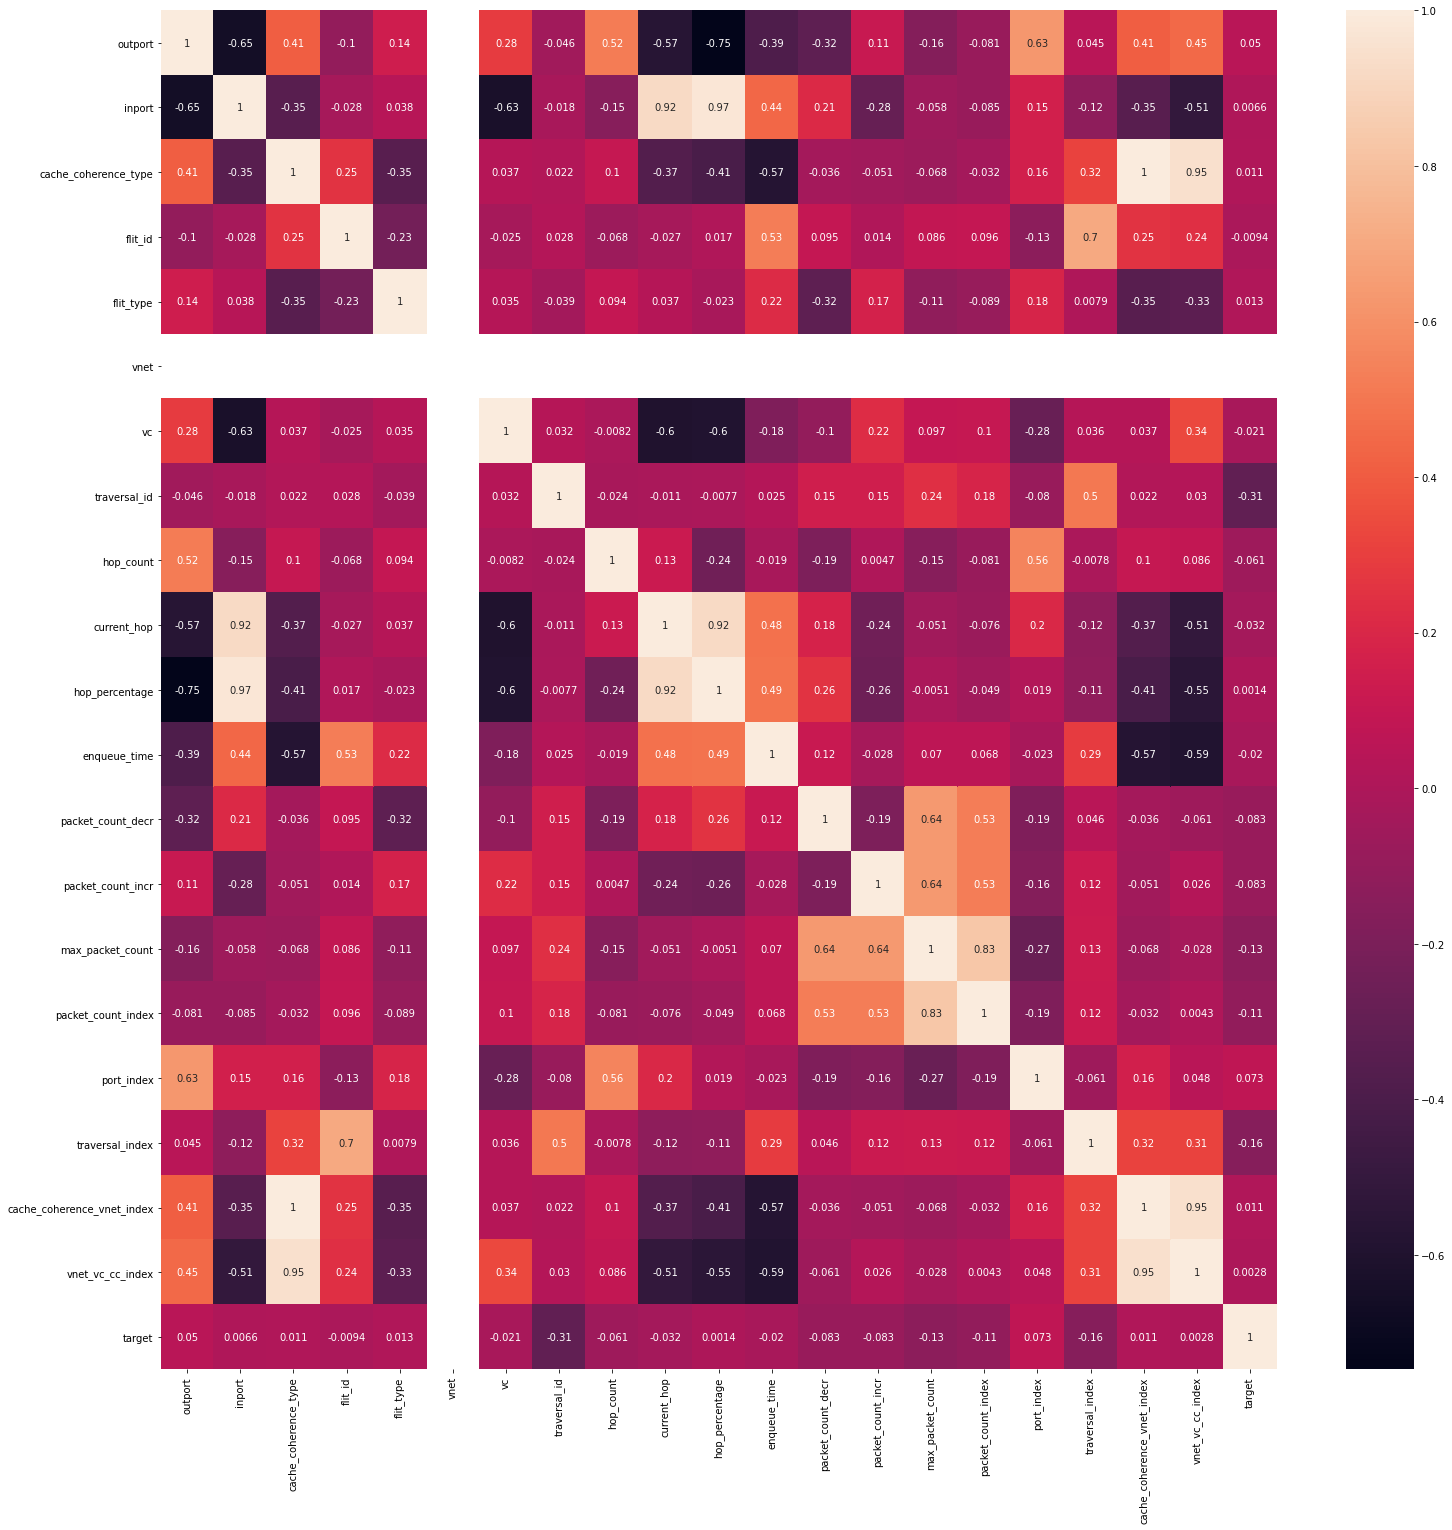

In [49]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [51]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['hop_percentage', 'inport', 'vnet_vc_cc_index', 'cache_coherence_type']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

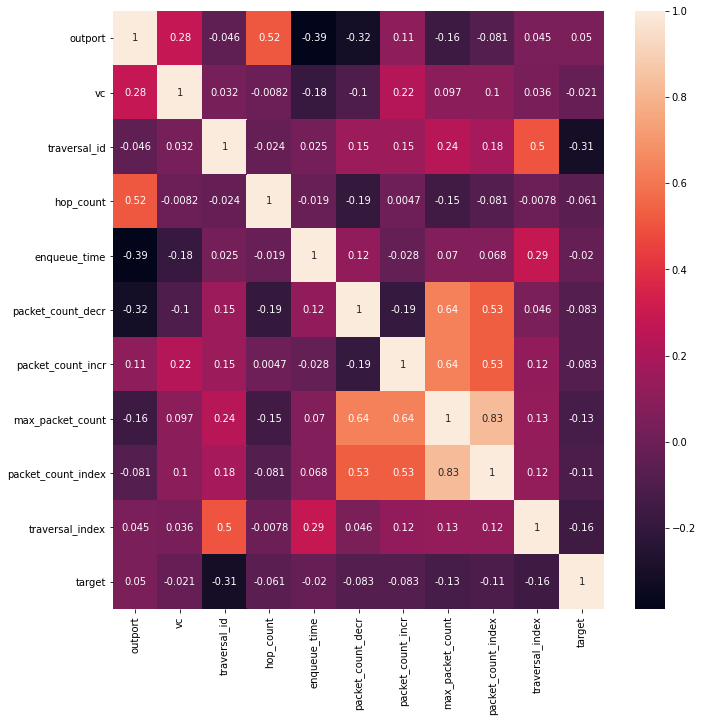

In [53]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

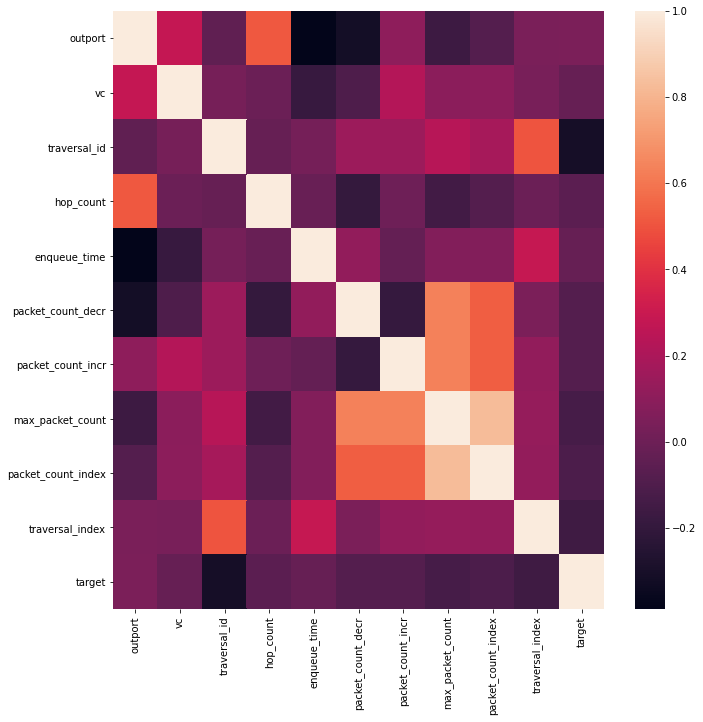

In [54]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [56]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.000000,0.000000,0.000033,0.50,0.214286,0.000000,0.000000,0.000000,0.000000,0.000001
1,1.000000,0.000000,0.000000,0.50,0.214286,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.000000,0.000066,0.50,0.214286,0.000000,0.000000,0.000000,0.000000,0.000003
3,0.000000,0.000000,0.000698,0.50,0.285714,0.070423,0.000000,0.070423,0.003757,0.000031
4,0.666667,0.000000,0.000698,0.50,0.000000,0.056338,0.014085,0.070423,0.006762,0.000066
...,...,...,...,...,...,...,...,...,...,...
154976,0.666667,0.333333,0.999801,0.50,0.375000,0.056338,0.126761,0.183099,0.036814,0.533331
154977,0.666667,0.333333,0.999801,0.50,0.500000,0.042254,0.140845,0.183099,0.032307,1.000000
154978,0.666667,0.666667,0.999834,0.50,0.500000,0.028169,0.154930,0.183099,0.026296,0.088888
154979,0.666667,1.000000,0.999801,0.25,0.017857,0.014085,0.169014,0.183099,0.018783,0.311108


In [57]:
train_X[train_X.duplicated()].shape

(2732, 10)

In [58]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.666667,0.000,0.000000,0.833333,0.000000,0.425197,0.000000,0.425197,0.012984,0.000000
1,1.000000,0.000,0.000067,0.666667,0.218182,0.417323,0.007874,0.425197,0.025727,0.000003
2,0.000000,1.000,0.000000,0.833333,0.363636,0.409449,0.015748,0.425197,0.037990,0.000000
3,0.000000,1.000,0.000000,0.833333,0.381818,0.401575,0.023622,0.425197,0.049772,0.000009
4,0.000000,1.000,0.000000,0.833333,0.400000,0.393701,0.031496,0.425197,0.061072,0.000015
...,...,...,...,...,...,...,...,...,...,...
78022,0.666667,0.125,0.999967,0.666667,0.381818,0.031496,0.070866,0.102362,0.011782,0.533332
78023,0.666667,0.125,0.999967,0.666667,0.509091,0.023622,0.078740,0.102362,0.010339,1.000000
78024,0.666667,0.250,1.000000,0.666667,0.509091,0.015748,0.086614,0.102362,0.008415,0.088889
78025,0.666667,0.375,0.999967,0.500000,0.018182,0.007874,0.094488,0.102362,0.006011,0.311109


In [59]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [60]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [61]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [62]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [63]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [64]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [65]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [67]:
train_Y = df['target']
train_Y.value_counts()

0    113922
1     41059
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  1670.307908
9     traversal_index   560.771550
7    max_packet_count   174.310471
8  packet_count_index   149.358157
0             outport   111.084810
5   packet_count_decr    88.595360
6   packet_count_incr    85.727476
3           hop_count    50.965225
1                  vc    23.840048
4        enqueue_time     5.513484


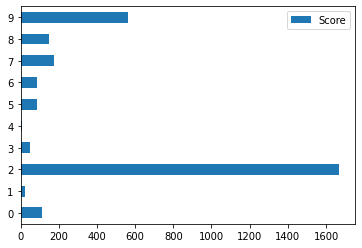

In [70]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r12.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [75]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.91627951993806
Test Prediction Score 92.04116527405878


In [76]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 86.15222935650479
Test Prediction Score 82.10397007091407
Test Prediction Score 85.75822740016876
Test Prediction Score 82.4069989707396
Test Prediction Score 87.26328692035422
Test Prediction Score 80.10216110019647
Test Prediction Score 86.23999779641642
Test Prediction Score 82.97838899803537


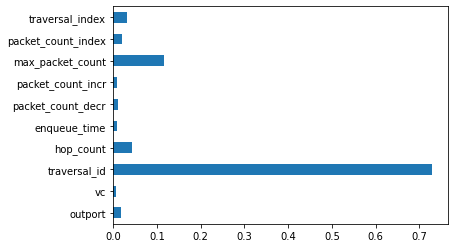

In [77]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

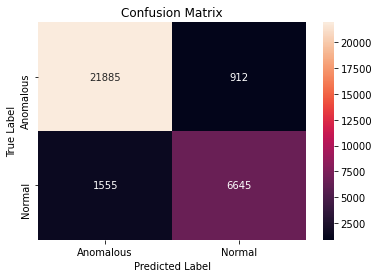

In [78]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     22797
           1       0.88      0.81      0.84      8200

    accuracy                           0.92     30997
   macro avg       0.91      0.89      0.90     30997
weighted avg       0.92      0.92      0.92     30997



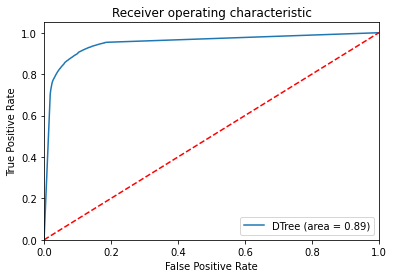

In [80]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [82]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r12l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [85]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.89434120531682
Test Prediction Score 97.55137593960706


In [86]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 85.95870660156099
Test Prediction Score 84.27047853034787
Test Prediction Score 85.60443149957808
Test Prediction Score 83.28922217320982
Test Prediction Score 86.14909997383245
Test Prediction Score 83.15127701375246
Test Prediction Score 85.81993967689957
Test Prediction Score 84.36935166994107


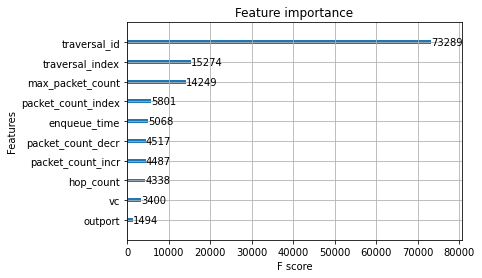

In [87]:
plot_importance(xgbc)
plt.show()

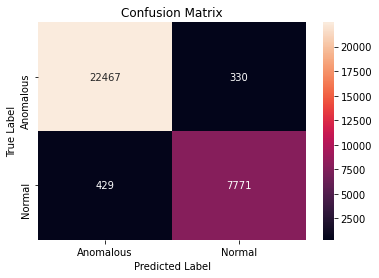

In [88]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [89]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     22797
           1       0.96      0.95      0.95      8200

    accuracy                           0.98     30997
   macro avg       0.97      0.97      0.97     30997
weighted avg       0.98      0.98      0.98     30997



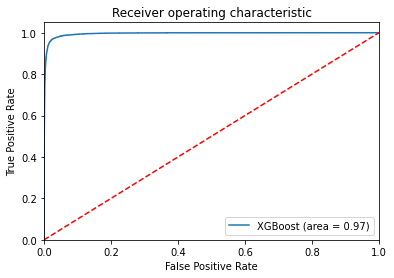

In [90]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()